In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('output_utf.csv')
df_clean = pd.read_csv('output_clean.csv')

print(df.shape, df_clean.shape)

(2778, 61) (2778, 47)


In [ ]:
plt.figure(figsize=(16, 8))

plt.title("Null values")

df.isnull().sum().plot(kind='bar')

plt.show()

In [35]:
df.columns

Index(['Name', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific Name', 'Quote', 'Text', 'Prey', 'Name Of Young',
       'Group Behavior', 'Fun Fact', 'Estimated Population Size',
       'Biggest Threat', 'Most Distinctive Feature', 'Other Name(s)',
       'Gestation Period', 'Habitat', 'Diet', 'Average Litter Size',
       'Lifestyle', 'Common Name', 'Number Of Species', 'Location', 'Slogan',
       'Group', 'Color', 'Skin Type', 'Top Speed', 'Lifespan', 'Weight',
       'Length', 'Age of Sexual Maturity', 'Age of Weaning', 'Litter Size',
       'Predators', 'Type', 'Height', 'Temperament', 'Age Of Independence',
       'Favorite Food', 'Distinctive Feature', 'Training', 'Main Prey',
       'Wingspan', 'Incubation Period', 'Age Of Fledgling', 'Nesting Location',
       'Migratory', 'Venomous', 'Aggression', 'Origin', 'Average Clutch Size',
       'Special Features', 'Diet for this Fish', 'Average Spawn Size',
       'Age of Molting', 'Optimum pH Level', 'Opt

## Aggression

<Axes: ylabel='count'>

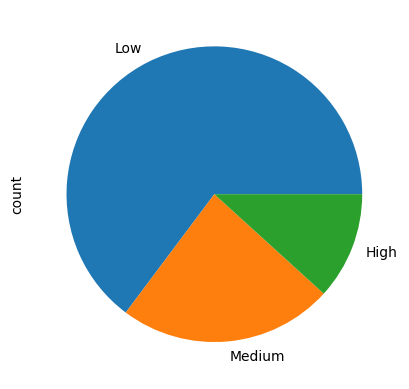

In [58]:
df['Aggression'].value_counts().plot(kind='pie')

## Temperament

In [47]:
import re

temp_count = {}
pattern = r",|and"
for elem in df['Temperament'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in temp_count):
            temp_count[prey.strip()] = 1
        else:
            temp_count[prey.strip()] += 1


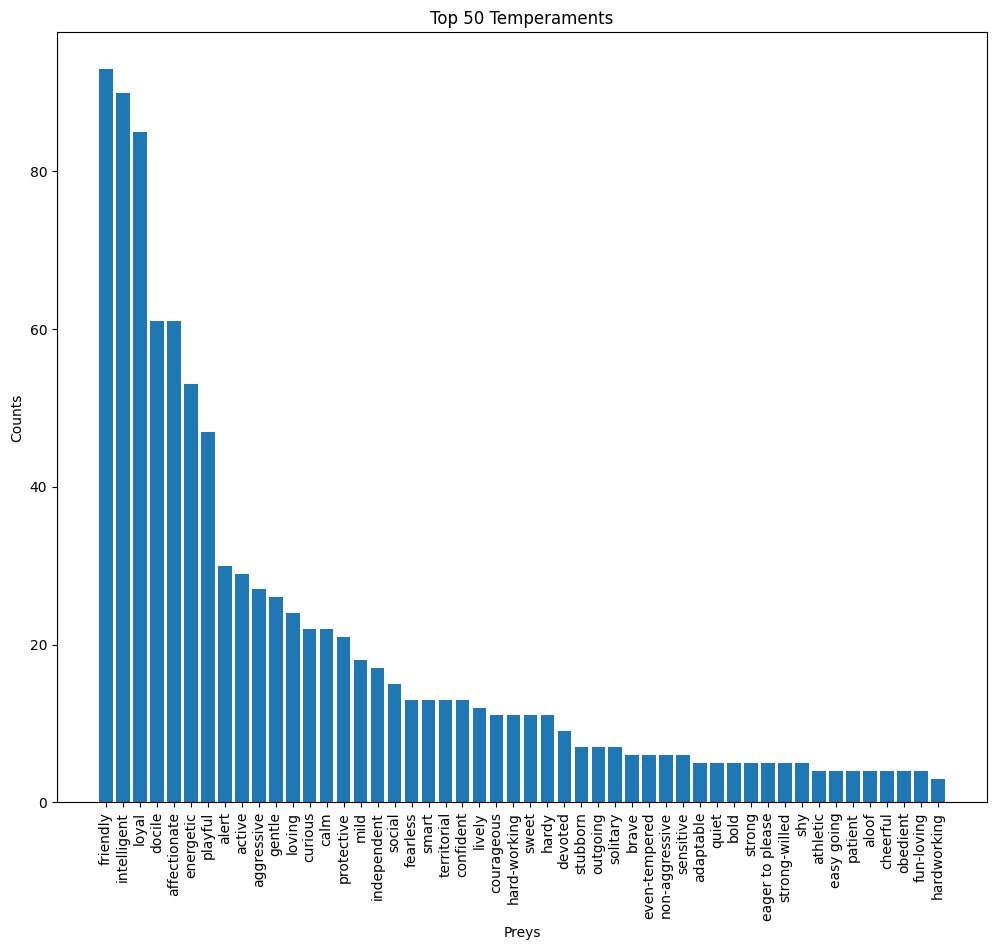

In [51]:
temperament_data = sorted(temp_count.items(), key=lambda x: x[1], reverse=True)

top = 50

temp_values = [item[0] for item in temperament_data[:top]]
temp_counts = [item[1] for item in temperament_data[:top]]

plt.figure(figsize=(12, 10))

# Plot for preys
plt.bar(temp_values, temp_counts)
plt.title(f'Top {top} Temperaments')
plt.xlabel('Preys')
plt.ylabel('Counts')
plt.tick_params(axis='x', rotation=90)

## Prey/Predator

In [15]:
import re

preys_count = {}
pattern = r",|and"
for elem in df['Prey'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in preys_count):
            preys_count[prey.strip()] = 1
        else:
            preys_count[prey.strip()] += 1

predator_count = {}
pattern = r",|and"
for elem in df['Predators'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in predator_count):
            predator_count[prey.strip()] = 1
        else:
            predator_count[prey.strip()] += 1

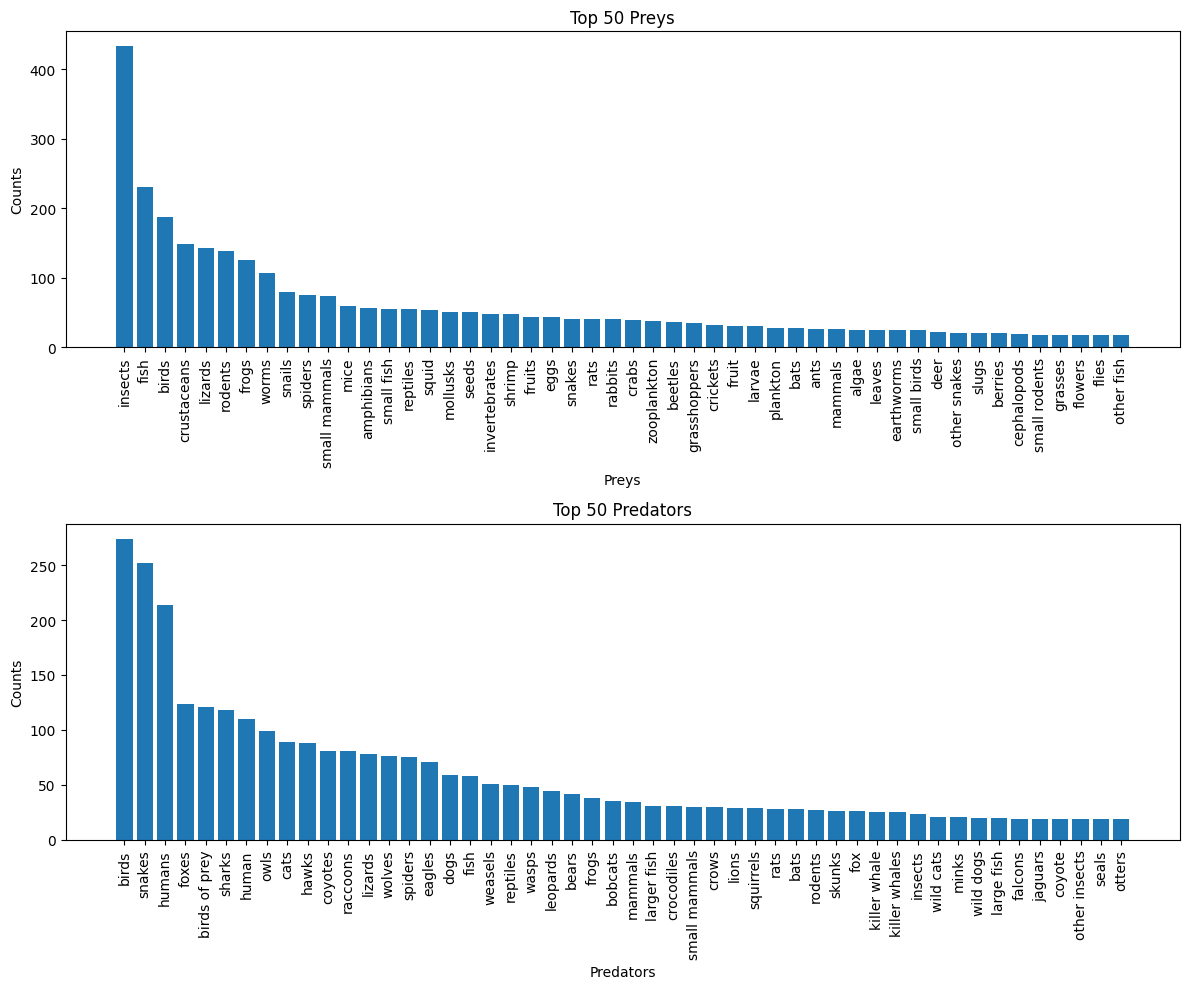

In [28]:
preys_data = sorted(preys_count.items(), key=lambda x: x[1], reverse=True)
predator_data = sorted(predator_count.items(), key=lambda x: x[1], reverse=True)

top = 50

preys_values = [item[0] for item in preys_data[:top]]
preys_counts = [item[1] for item in preys_data[:top]]

predator_values = [item[0] for item in predator_data[:top]]
predator_counts = [item[1] for item in predator_data[:top]]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for preys
ax1.bar(preys_values, preys_counts)
ax1.set_title(f'Top {top} Preys')
ax1.set_xlabel('Preys')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=90)

# Plot for predators
ax2.bar(predator_values, predator_counts)
ax2.set_title(f'Top {top} Predators')
ax2.set_xlabel('Predators')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

## Biggest Threat

) missing from current font.g\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


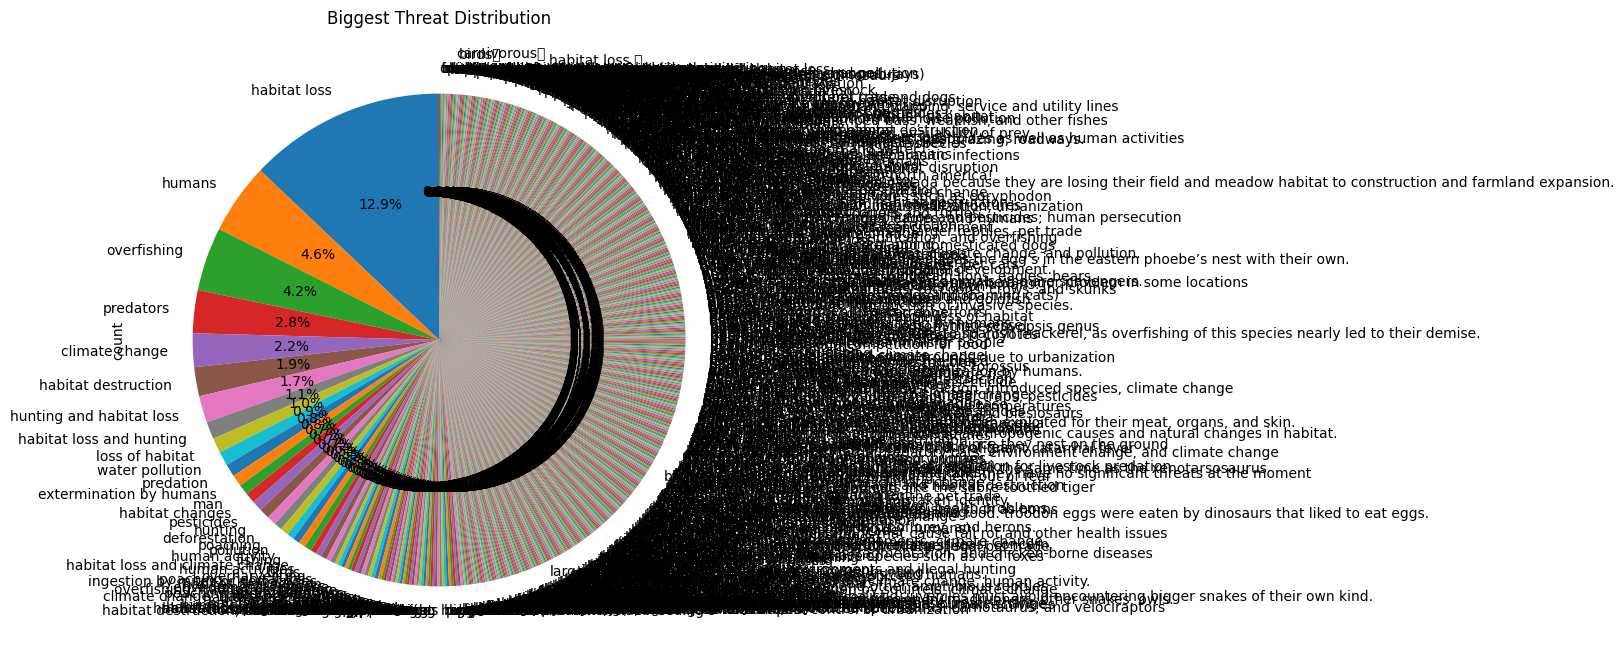

In [54]:
threshold = 1

threat_counts = df['Biggest Threat'].str.lower().value_counts()

threat_counts['Others'] = threat_counts[threat_counts < threshold].sum()

threat_counts = threat_counts[threat_counts >= threshold]

plt.figure(figsize=(8, 8))  # Set the figure size

threat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Biggest Threat Distribution')

plt.show()

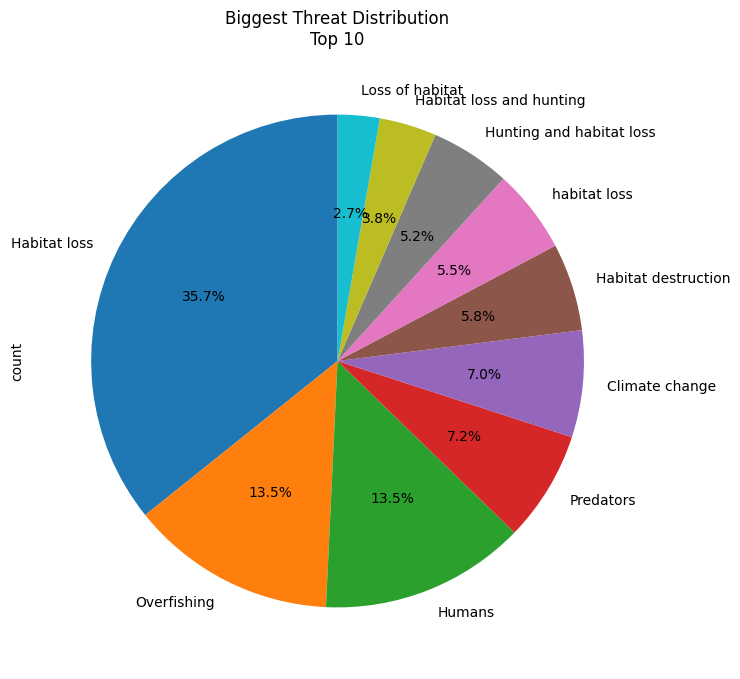

In [30]:
N = 10
plt.figure(figsize=(8, 8))  # Set the figure size

threat_counts.head(N).plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title(f'Biggest Threat Distribution\nTop {N}')

plt.show()

## Genus

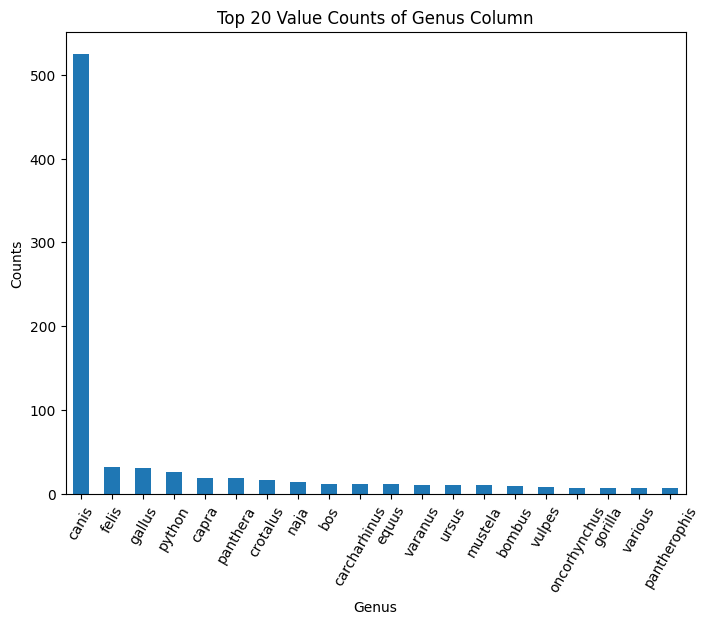

In [56]:
value_counts = df_clean['Genus'].str.lower().value_counts()

plt.figure(figsize=(8, 6))

value_counts.head(20).plot(kind='bar')

plt.xticks(rotation=60)

plt.xlabel('Genus')
plt.ylabel('Counts')
plt.title('Top 20 Value Counts of Genus Column')

# Show the plot
plt.show()


## Genus Canis - Scientific names

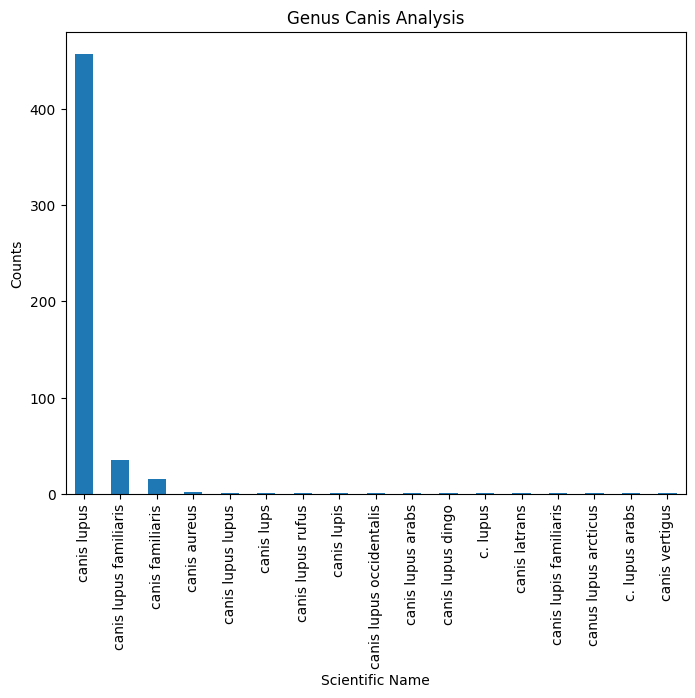

In [55]:
value_counts = df_clean[df_clean['Genus'] == 'Canis']['Scientific Name'].str.lower().value_counts()

plt.figure(figsize=(8, 6))

value_counts.head(20).plot(kind='bar')

plt.xticks(rotation=90)

plt.xlabel('Scientific Name')
plt.ylabel('Counts')
plt.title('Genus Canis Analysis')

# Show the plot
plt.show()

## Phylum

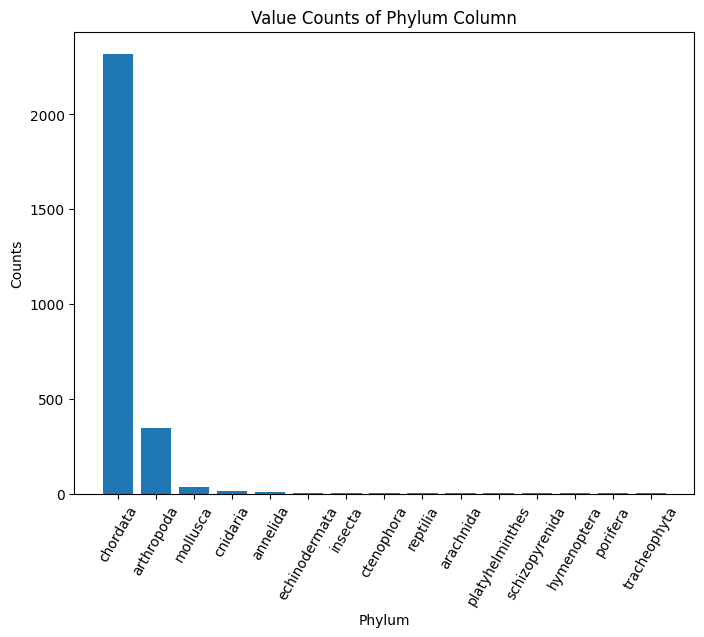

In [57]:
value_counts = df_clean['Phylum'].str.lower().value_counts()

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)

plt.xticks(rotation=60)

plt.xlabel('Phylum')
plt.ylabel('Counts')
plt.title('Value Counts of Phylum Column')

# Show the plot
plt.show()

## Diet

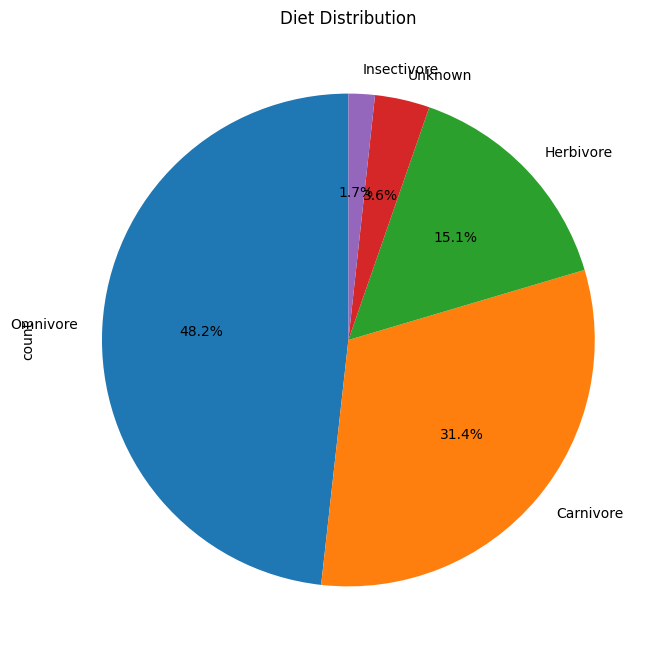

In [34]:
diet_category = df_clean['Diet'].apply(lambda elem: elem.split(' ')[0] if pd.notna(elem) else 'Unknown').apply(lambda x: x if x.endswith('ore') else "Unknown")

plt.figure(figsize=(8, 8))  # Set the figure size

diet_category.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Diet Distribution')

plt.show()